**Exploring the data** looking at the different variables and what is available, as well as trying to unedrstand some of it. 

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs

In [15]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var167.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var167.nc')
da

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 22200, lon: 192, lat: 96)
Coordinates:
  * time     (time) float64 178kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 768B 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Data variables:
    var167   (time, lat, lon) float32 2GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jan 02 17:48:12 2020: cdo cat slo0059__echam6_BOT_mm_70...
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

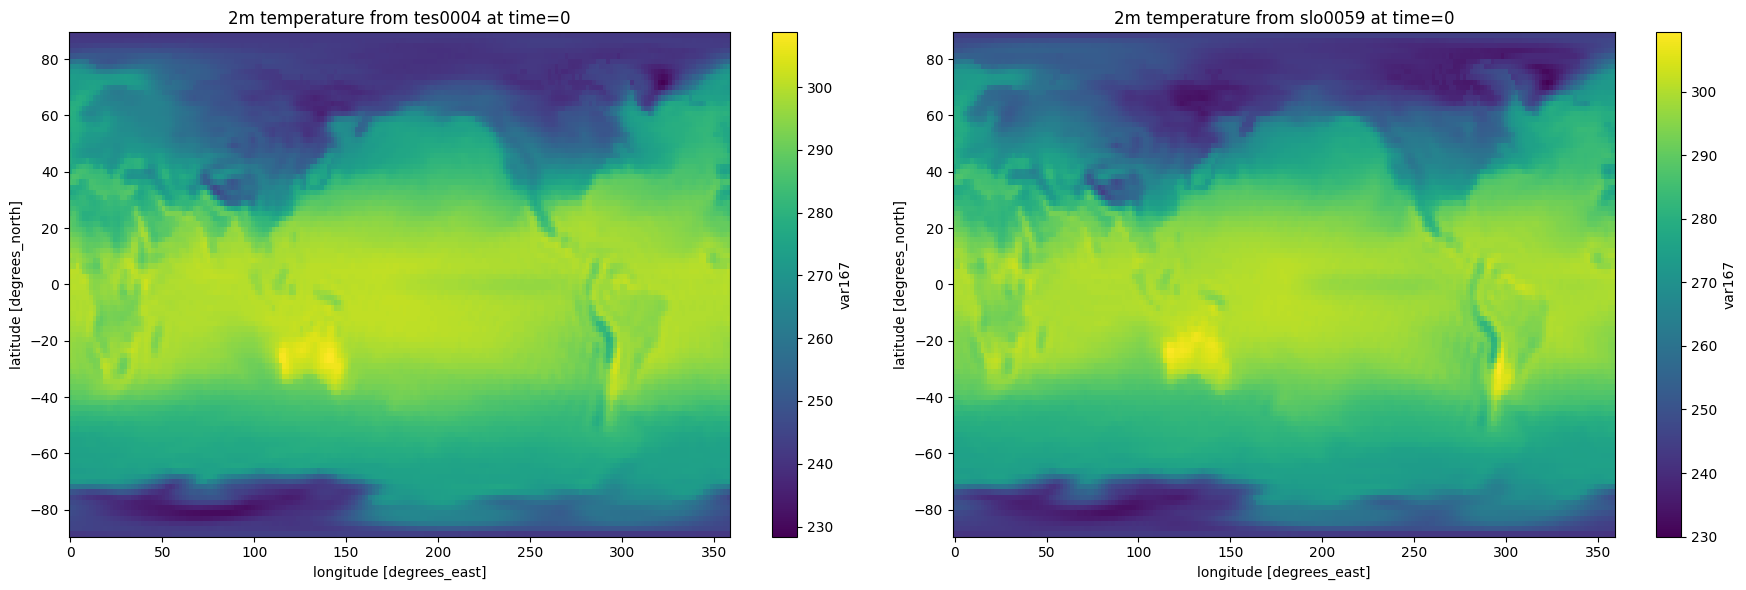

In [21]:
var_tes = ds['var167']
var_slo = da['var167']

# Select a single time step (e.g., the first one)
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))  # ← missing parenthesis fixed

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("2m temperature from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("2m temperature from slo0059 at time=0")

plt.tight_layout()
plt.show()

/nird/home/elihho/.local/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


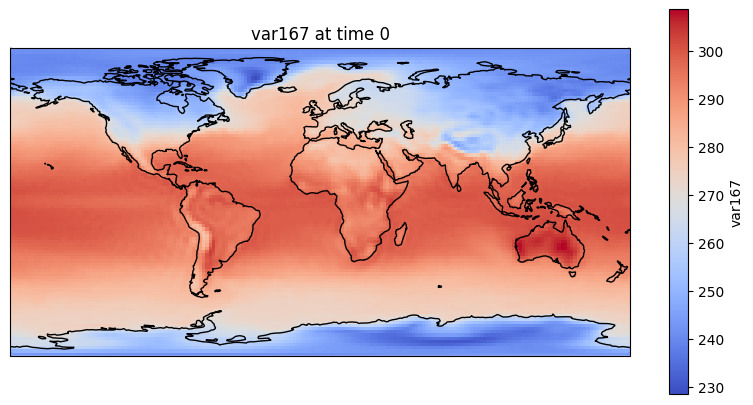

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var167'].isel(time=0)

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'var167'})
ax.coastlines()
ax.set_title('var167 at time 0')
plt.show()

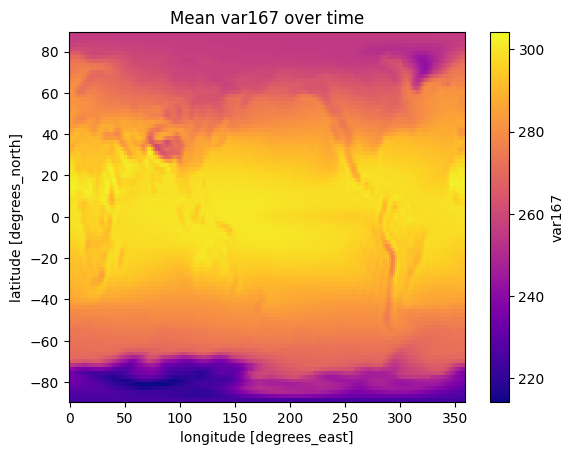

In [6]:
mean_map = ds['var167'].mean(dim='time')
mean_map.plot(cmap='plasma')
plt.title("Mean var167 over time")
plt.show()

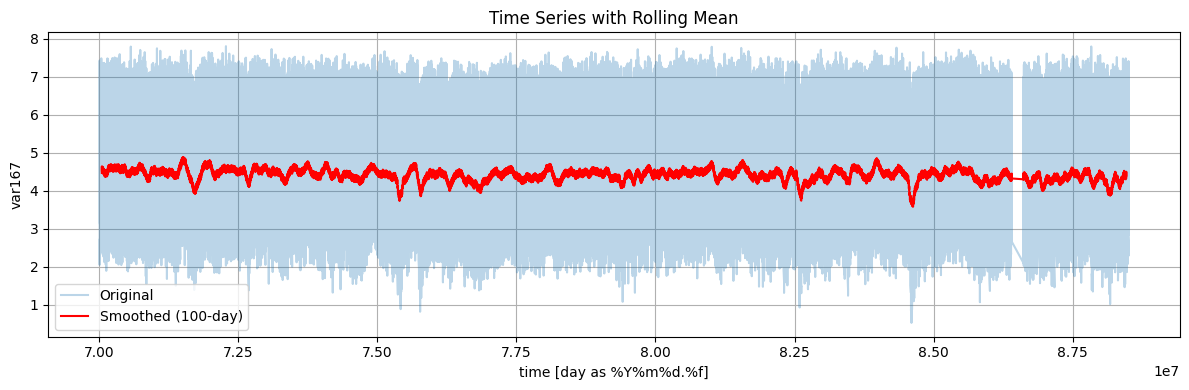

In [14]:
ts = ds["var167"].mean(dim=["lat", "lon"])-273.12
smoothed = ts.rolling(time=100, center=True).mean()

plt.figure(figsize=(12, 4))
ts.plot(label="Original", alpha=0.3)
smoothed.plot(label="Smoothed (100-day)", color='red')
plt.title("Time Series with Rolling Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()